In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from statsmodels.graphics import utils
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.stats.stattools as sms
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from PIL import Image

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [4]:
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

# Zillow's Home Value Prediction(Zestimate)

### 1. Zestimate란?
### 2. 목표
### 3. 주어진 데이터
### 4. Data Cleaning -> Single Model -> K-Fold Cross Validation -> Final Prediction
### 5. Kaggle
### 6. Insight와 한계점

## 1. Zestimate란?

#### - Estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property

## 2. 목표

### 2.1. 가격을 예측하는 것이 아니라 `가격 오차(log-error)`를 예측.
### 2.2. Linear Regression을 이용해 결과 도출
### 2.3. Insight와 한계점 

## 3. 주어진 데이터

#### 3.1. Properties

In [5]:
df_1 = pd.read_csv("properties_2016.csv")
df_1 = df_1.set_index("parcelid")
df_1.tail()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_3 = pd.read_csv("properties_2017.csv")
df_3 = df_3.set_index("parcelid")
df_3.tail()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12766630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.2. Train

In [7]:
df_2 = pd.read_csv("train_2016_v2.csv")
df_2 = df_2.set_index("parcelid")
df_2.tail()

,logerror,transactiondate
parcelid,,
10774160,-0.0356,2016-12-30
12046695,0.0070,2016-12-30
12995401,-0.2679,2016-12-30
11402105,0.0602,2016-12-30
12566293,0.4207,2016-12-30


In [8]:
df_4 = pd.read_csv("train_2017.csv")
df_4 = df_4.set_index("parcelid")
df_4.tail()

,logerror,transactiondate
parcelid,,
10833991,-0.002245,2017-09-20
11000655,0.020615,2017-09-20
17239384,0.013209,2017-09-21
12773139,0.037129,2017-09-21
12826780,0.007204,2017-09-25


#### 3.3. Sample Submission file

In [9]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.tail()

,ParcelId,201610,201611,201612,201710,201711,201712
2985212,168176230,0,0,0,0,0,0
2985213,14273630,0,0,0,0,0,0
2985214,168040630,0,0,0,0,0,0
2985215,168040830,0,0,0,0,0,0
2985216,168040430,0,0,0,0,0,0


## 4. Data Cleaning -> Single Model -> K-Fold Cross Validation -> Final Prediction

## 4.1. Data Cleaning

### 4.1.1. Logerror

### $logerror = log(Zestimate) - log(SalePrice)$

In [10]:
df = pd.concat([df_2, df_1], join='inner', axis=1)

#### 정규분포를 그리는가?

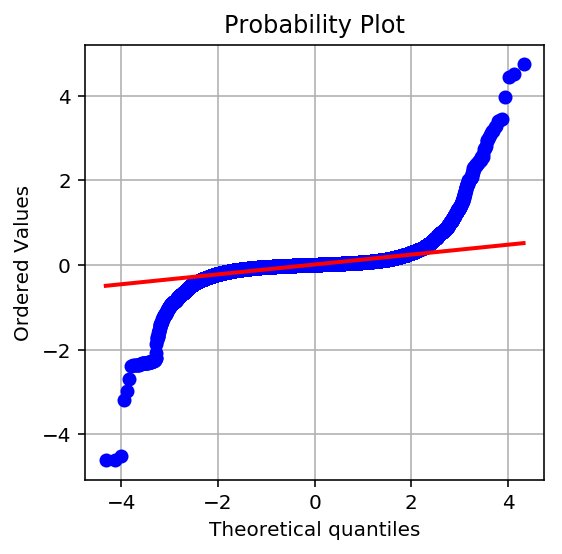

In [11]:
sns.distplot(df["logerror"], bins = 50)
plt.xlim(-4,4)
plt.subplot(132)
sp.stats.probplot(df["logerror"], plot=plt)
plt.show()

### 4.1.2. Features

In [12]:
df.dtypes

logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64


- float type
    - categorical type
    - numerical type
- object
    - categorical type
    - numerical type

In [13]:
# missing ratio
feature_info = pd.DataFrame(columns = ['x','missing_ratio','dtype', 'unique_value_counts'])
feature_info['x'] = df.columns
feature_info['missing_ratio'] = [(len(df) - len(df[x].dropna()))/len(df) for x in df.columns]
feature_info['dtype'] = [df[x].dtypes for x in df.columns]
feature_info['unique_value_counts'] = [len(df[x].unique()) for x in df.columns]
feature_info.sort_values('missing_ratio', inplace=True)
feature_info.reset_index(drop=True).iloc[1:,:]

,x,missing_ratio,dtype,unique_value_counts
1,longitude,0.000000,float64,71900
2,propertylandusetypeid,0.000000,float64,14
3,rawcensustractandblock,0.000000,float64,42647
4,regionidcounty,0.000000,float64,3
5,roomcnt,0.000000,float64,17
6,latitude,0.000000,float64,73312
7,fips,0.000000,float64,3
8,bedroomcnt,0.000000,float64,17
9,bathroomcnt,0.000000,float64,23
10,assessmentyear,0.000000,float64,1


In [14]:
numerical = ['taxamount', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'bathroomcnt', 'finishedsquarefeet6', 'lotsizesquarefeet', 'regionidneighborhood', 'latitude']
categorical = ['poolcnt', 'garagecarcnt', 'unitcnt', 'heatingorsystemtypeid', 'fips', 'fireplacecnt', 'propertylandusetypeid', 'roomcnt', 'bedroomcnt', 'transactiondate']

In [15]:
df['transactiondate'] = df['transactiondate'].astype('datetime64').dt.month
df['taxdelinquencyyear'].replace(99, -1, inplace=True)
df['taxdelinquencyyear'] = 16 - df['taxdelinquencyyear']
df['taxamount'].fillna(df['taxamount'].mean(), inplace=True)
df['taxdelinquencyyear'].fillna(0, inplace=True)
df['taxdelinquencyflag'].fillna(0, inplace=True)
df['landtaxvaluedollarcnt'].fillna(df['landtaxvaluedollarcnt'].mean(), inplace=True)
df['structuretaxvaluedollarcnt'].fillna(df['structuretaxvaluedollarcnt'].mean(), inplace=True)
df['propertycountylandusecode'].fillna(df['propertycountylandusecode'].mode()[0], inplace=True)
df['regionidzip'].fillna(df['regionidzip'].mode()[0], inplace=True)
df['poolcnt'].fillna(0, inplace=True)
df['pooltypeid2'].fillna(0, inplace=True)
df['pooltypeid10'].fillna(0, inplace=True)
df['poolsizesum'].fillna(df['poolsizesum'].mean(), inplace=True)
df['garagecarcnt'].fillna(-1, inplace=True)
df['garagetotalsqft'].fillna(df['garagetotalsqft'].mode()[0], inplace=True)
df['calculatedfinishedsquarefeet'].fillna(df['calculatedfinishedsquarefeet'].mean(), inplace=True)
df['finishedfloor1squarefeet'].fillna(df['finishedfloor1squarefeet'].mean(), inplace=True)
df['finishedsquarefeet50'].fillna(df['finishedsquarefeet50'].mean(), inplace=True)
df['finishedsquarefeet15'].fillna(df['finishedsquarefeet15'].mean(), inplace=True)
df['finishedsquarefeet13'].fillna(df['finishedsquarefeet13'].mean(), inplace=True)
df['finishedsquarefeet6'].fillna(df['finishedsquarefeet6'].mean(), inplace=True)
df['yearbuilt'].fillna(df['yearbuilt'].mode()[0], inplace=True)
df['regionidcity'].fillna(df['regionidcity'].mode()[0], inplace=True)
df['lotsizesquarefeet'].fillna(df['lotsizesquarefeet'].mean(), inplace=True)
df['unitcnt'].fillna(0, inplace=True)
df['propertyzoningdesc'].fillna(df['propertyzoningdesc'].mode()[0], inplace=True)
df['buildingqualitytypeid'].fillna(0, inplace=True)
df['heatingorsystemtypeid'].fillna(0, inplace=True)
df['regionidneighborhood'].fillna(df['regionidneighborhood'].mean(), inplace=True)
df['airconditioningtypeid'].fillna(0, inplace=True)
df['numberofstories'].fillna(0, inplace=True)
df['fireplacecnt'].fillna(0, inplace=True)
df['yardbuildingsqft17'].fillna(df['yardbuildingsqft17'].mean(), inplace=True)
df['hashottuborspa'].fillna(0, inplace=True)
df['decktypeid'].fillna(0, inplace=True)
df['typeconstructiontypeid'].fillna(0, inplace=True)
df['architecturalstyletypeid'].fillna(0, inplace=True)
df['fireplaceflag'].fillna(0, inplace=True)
df['yardbuildingsqft26'].fillna(df['yardbuildingsqft26'].mean(), inplace=True)
df['basementsqft'].fillna(df['basementsqft'].mean(), inplace=True)
df['storytypeid'].fillna(0, inplace=True)
df['buildingqualitytypeid'].fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


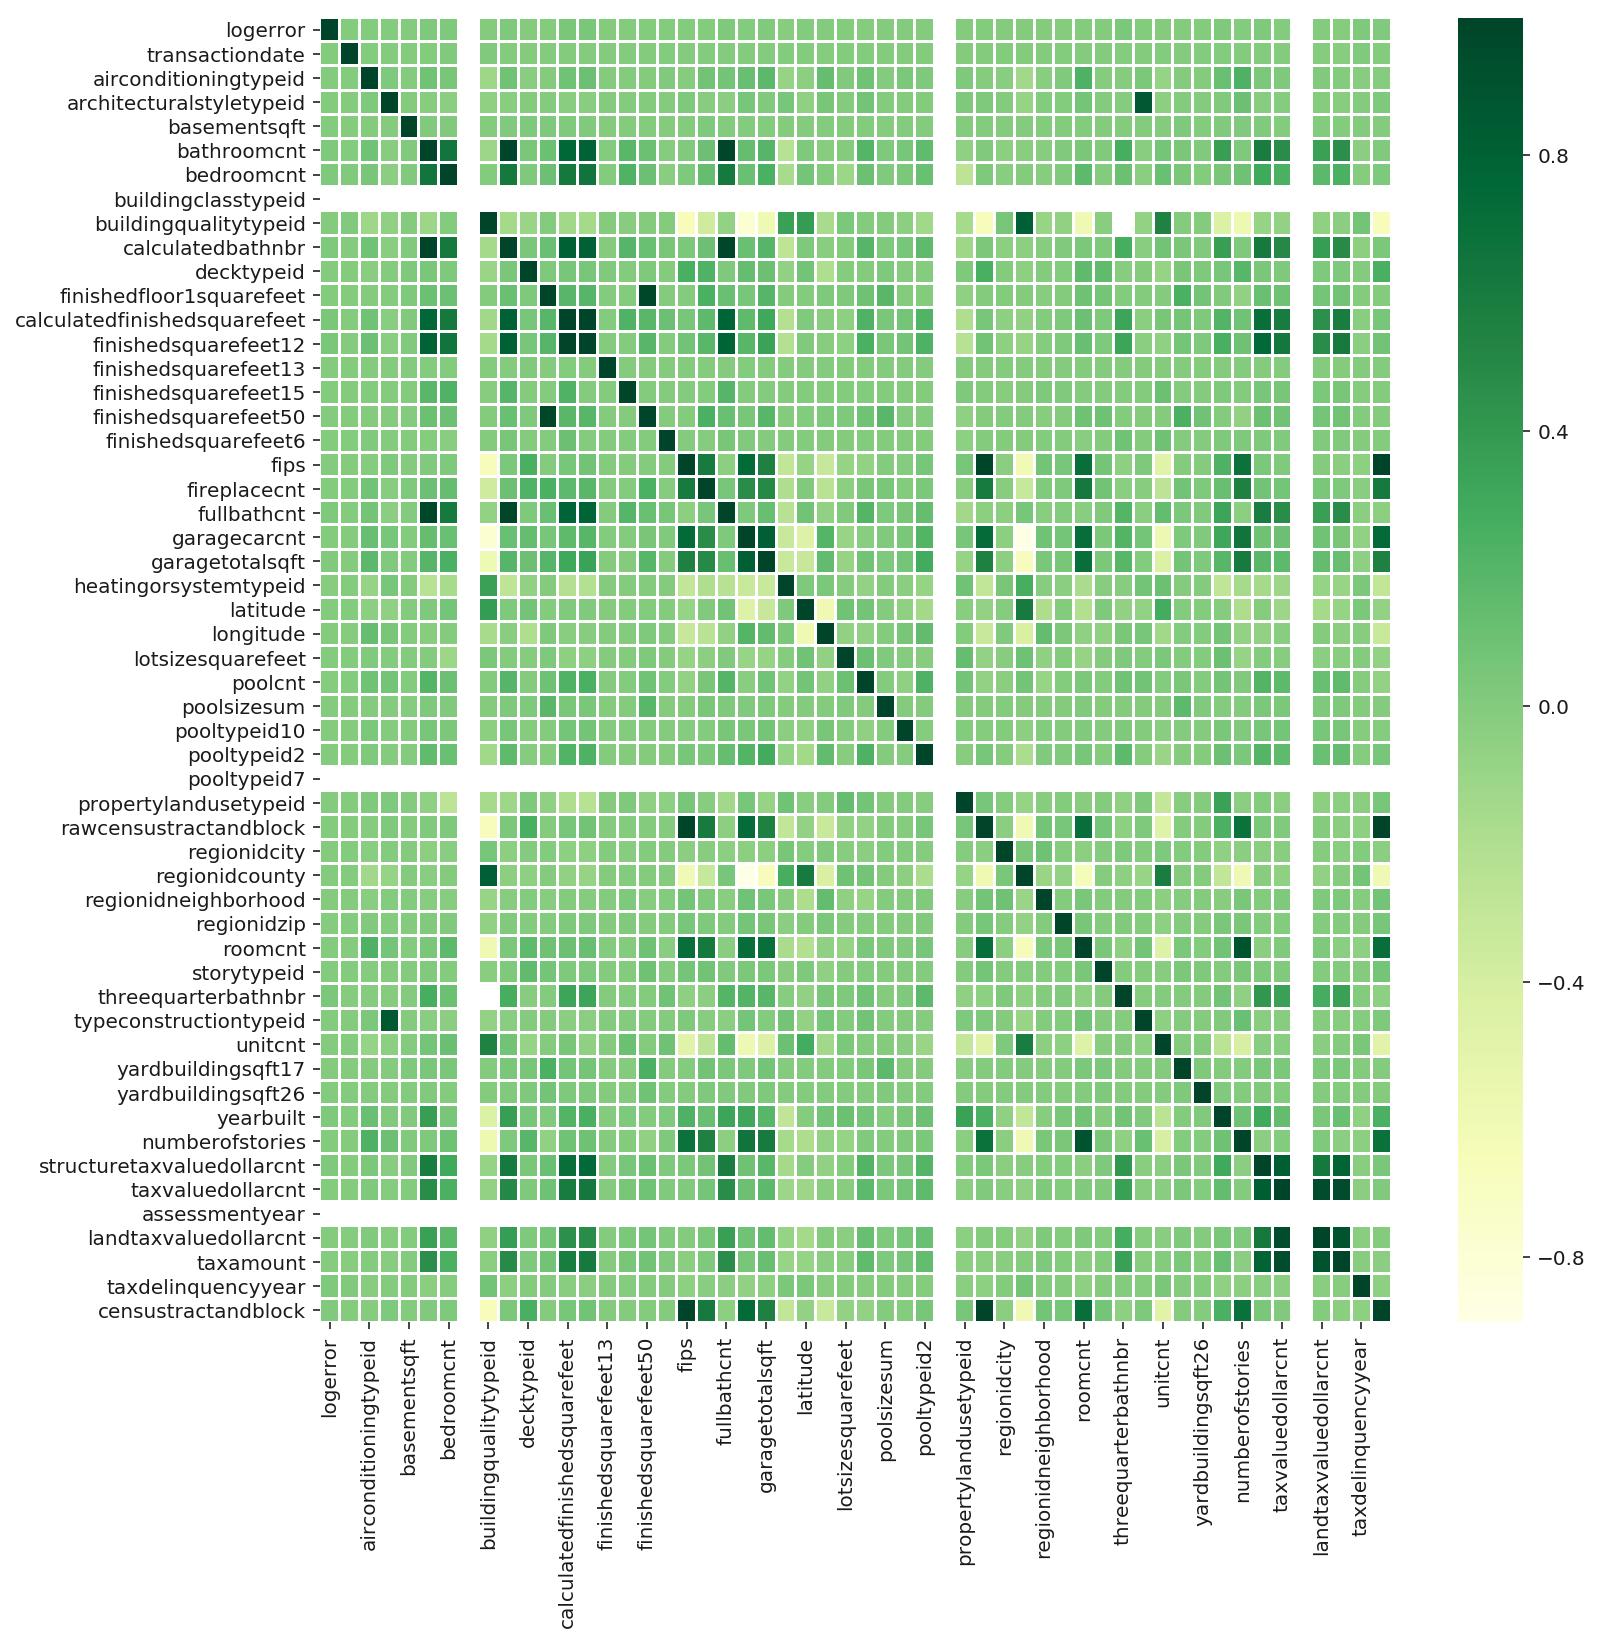

In [16]:
plt.figure(figsize=(12,12))
sns.set_color_codes()
sns.heatmap(df.corr(), cmap="YlGn", linewidths=1)
plt.show()

#### 변수 변환

##### log를 취할 수 있는 features

In [17]:
# fireplacecnt
# garagecarcnt
# lotsizesquarefeet
# unitcnt
# structuretaxvaluedolloarcnt
# landtaxcaluedollarcnt
# taxamount

## 4.2. Single Model - Linear Regression

### 4.2.1. StatsModels - OLS.from_formula

In [18]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount)+ scale(landtaxvaluedollarcnt)+ scale(structuretaxvaluedollarcnt)+ scale(bathroomcnt)+ scale(poolsizesum)+ scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(yearbuilt)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17)+ scale(yardbuildingsqft26)+ scale(basementsqft)+ scale(longitude)+ scale(latitude) + C(taxdelinquencyyear)+ C(propertycountylandusecode)+ C(fips)+ C(poolcnt)+ C(pooltypeid2)+ C(pooltypeid10)+ C(garagecarcnt)+ C(regionidcity)+ C(unitcnt)+ C(propertyzoningdesc)+ C(buildingqualitytypeid)+ C(heatingorsystemtypeid)+ C(airconditioningtypeid)+ C(numberofstories)+ C(fireplacecnt)+ C(hashottuborspa)+ C(decktypeid)+ C(typeconstructiontypeid)+ C(architecturalstyletypeid)+ C(fireplaceflag)+ C(storytypeid)+ C(buildingqualitytypeid)+ C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate)+ C(taxdelinquencyflag)', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.060
Date:                Sat, 07 Jul 2018   Prob (F-statistic):          1.70e-170
Time:                        03:22:18   Log-Likelihood:            -1.2563e+05
No. Observations:               90275   AIC:                         2.560e+05
Df Residuals:                   87880   BIC:                         2.786e+05
Df Model:                        2394                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


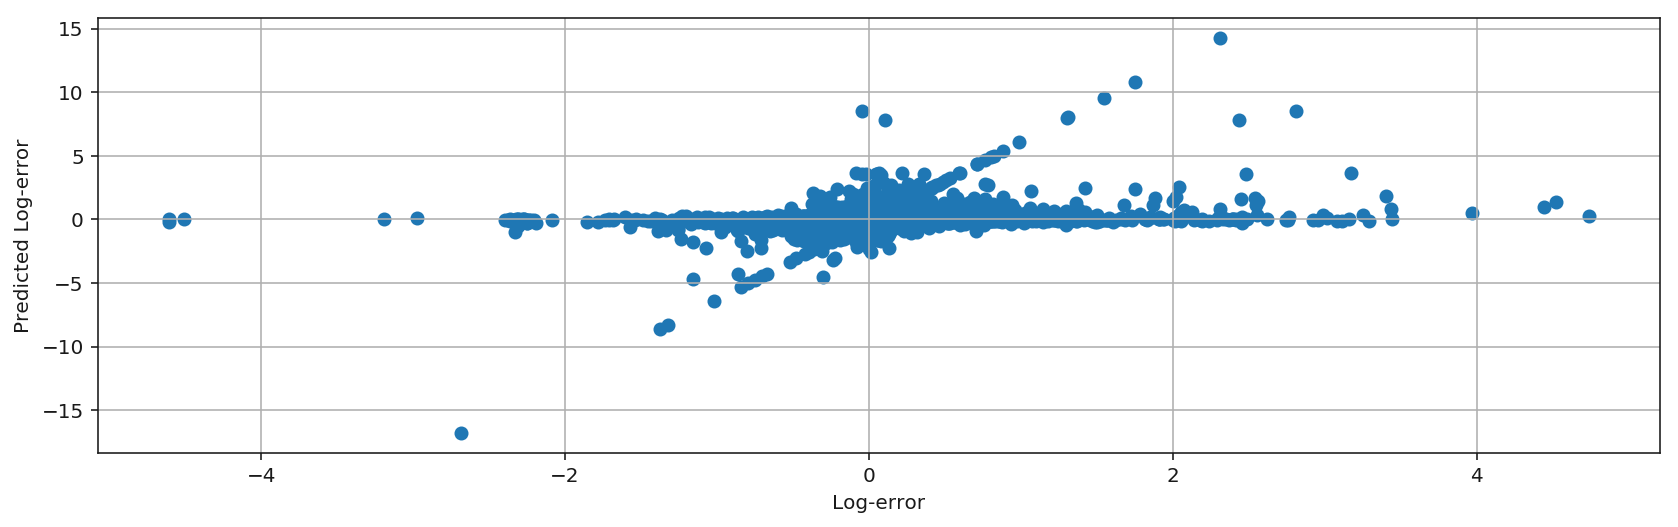

In [19]:
predictions = model.fit().predict(df)

plt.scatter(df["logerror"], predictions)
plt.xlabel("Log-error")
plt.ylabel("Predicted Log-error")
plt.show()

### 4.2.2. Partial Regression

#### 4.2.2.1. Partial Regression Plot

In [20]:
model2 = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount)+ scale(landtaxvaluedollarcnt)+ scale(structuretaxvaluedollarcnt)+ scale(bathroomcnt)+ scale(poolsizesum)+ scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(yearbuilt)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17)+ scale(yardbuildingsqft26)+ scale(basementsqft)+ scale(longitude)+ scale(latitude)', data=df)
result2 = model2.fit()

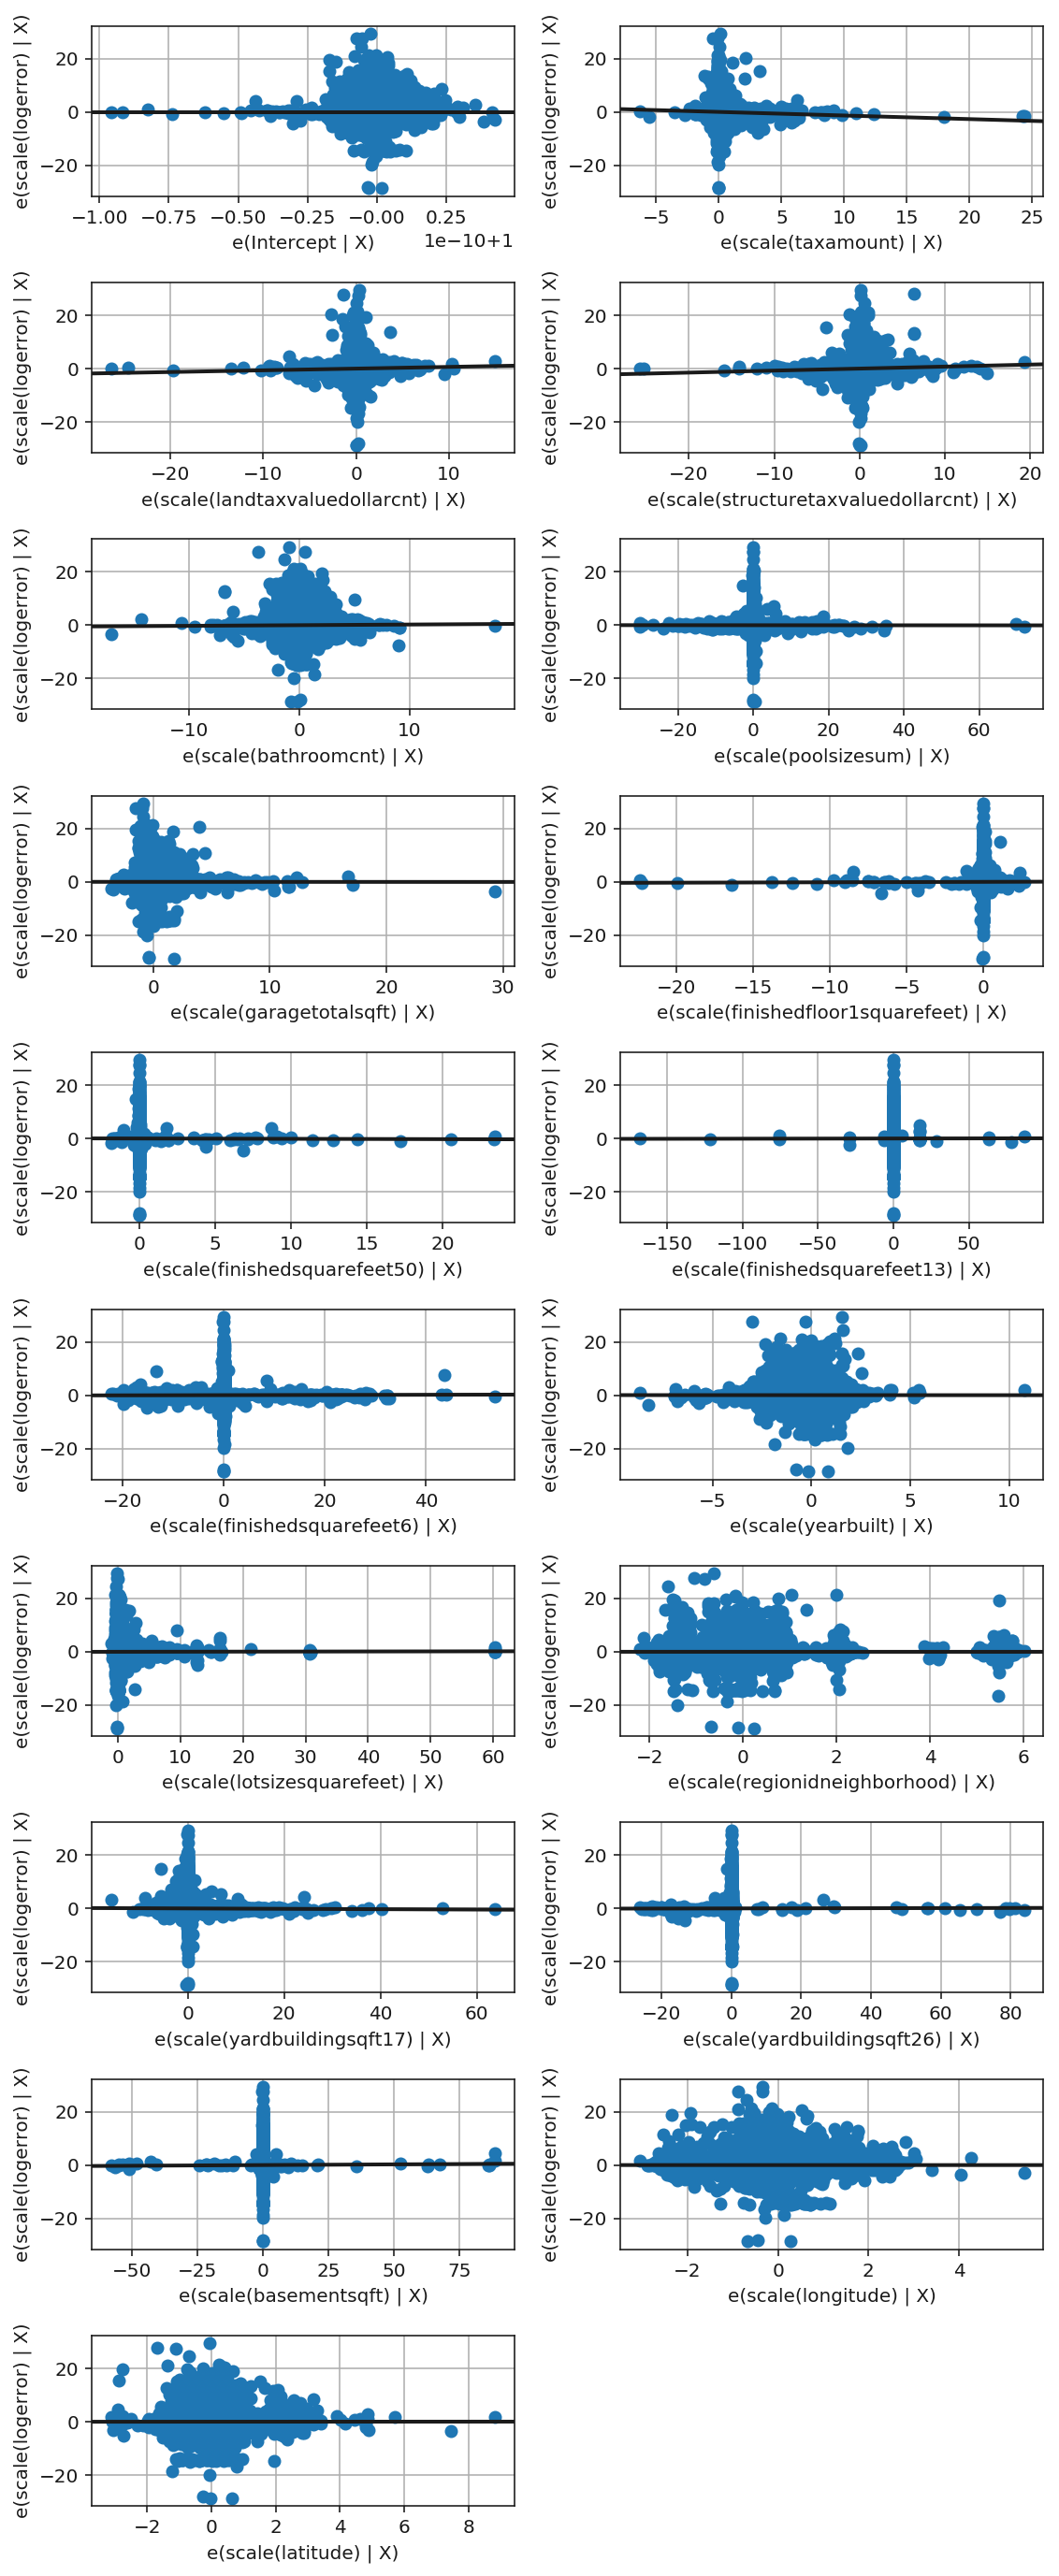

In [21]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result2, fig=fig)
fig.suptitle("")
plt.show()

#### 4.2.2.2. CCPR Plot

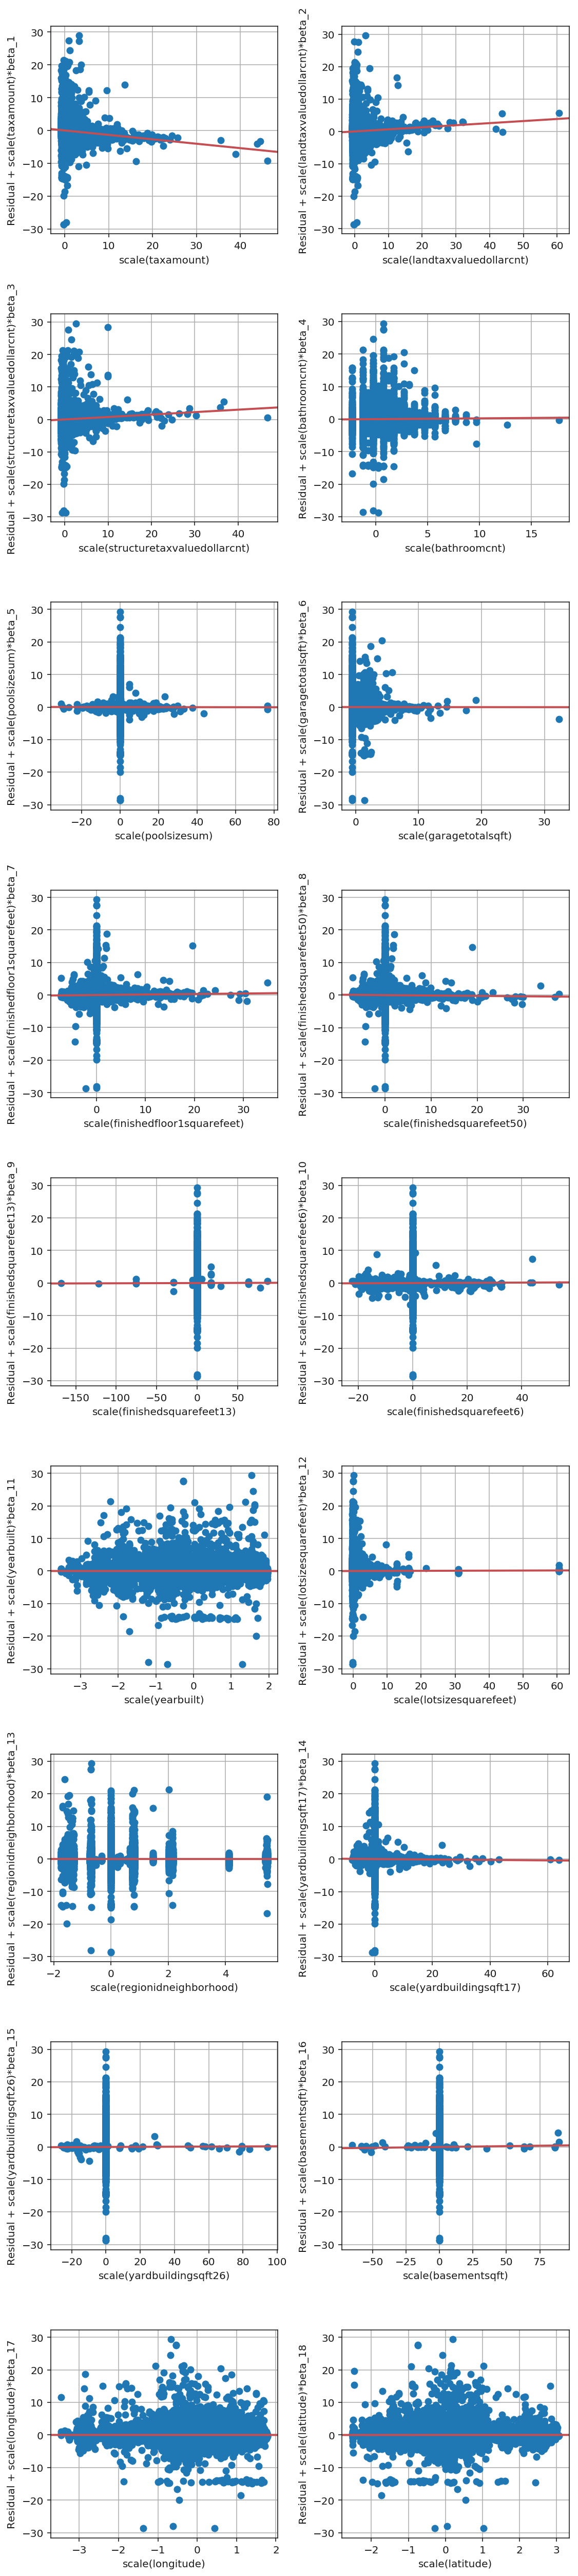

In [22]:
fig = plt.figure(figsize=(8, 40))
sm.graphics.plot_ccpr_grid(result2, fig=fig)
fig.suptitle("")
plt.show()

In [23]:
# Partial 을 쓰든 CCPR을 쓰든 결과는 같음. 다른 점은 CCPR은 독립변수의 값이 그대로 나타남

### 4.2.3. Residual Distribution

#### 4.2.3.1. 잔차의 정규성 검정

##### QQ Plot

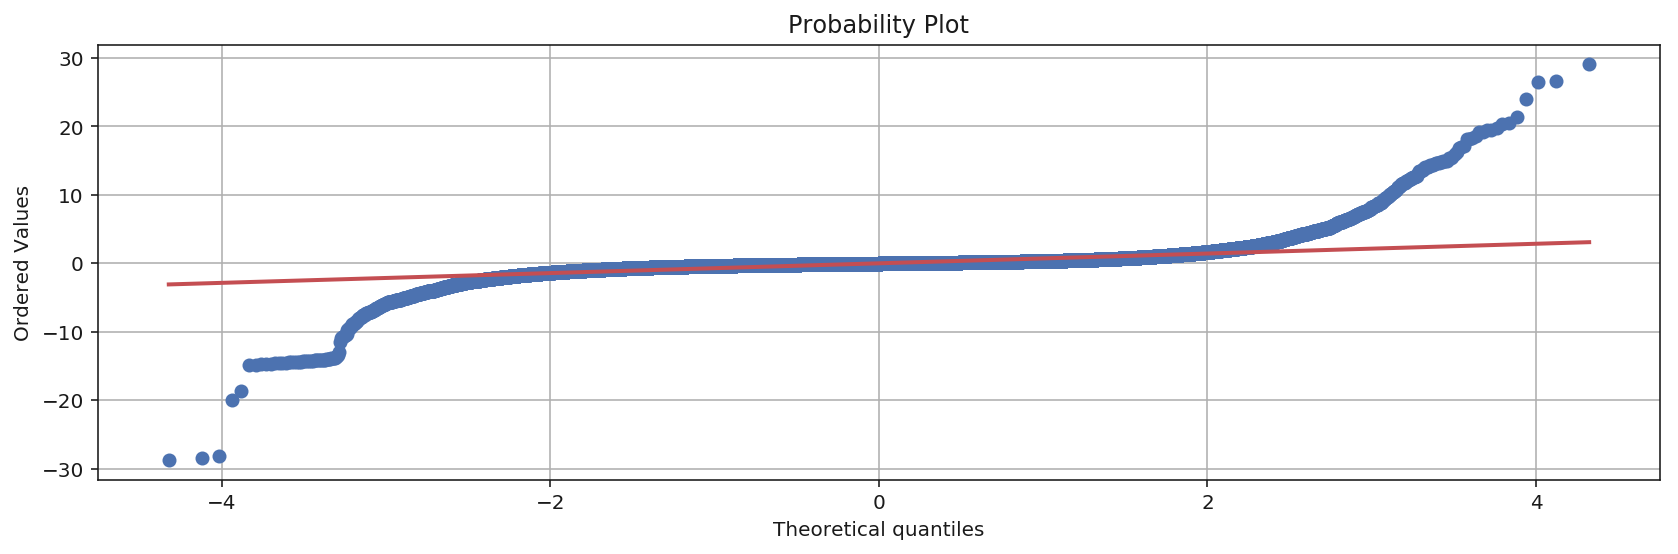

In [24]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

##### Omnibus Test

In [25]:
test_om = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test_om):
    print("%-12s: %6.3f" % xi)

Chi^2       : 62785.881
P-value     :  0.000


##### Jarque_Bera Test

In [26]:
test_ja = sms.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test_ja):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 66703068.374
P-value     :  0.000
Skew        :  1.938
Kurtosis    : 136.110


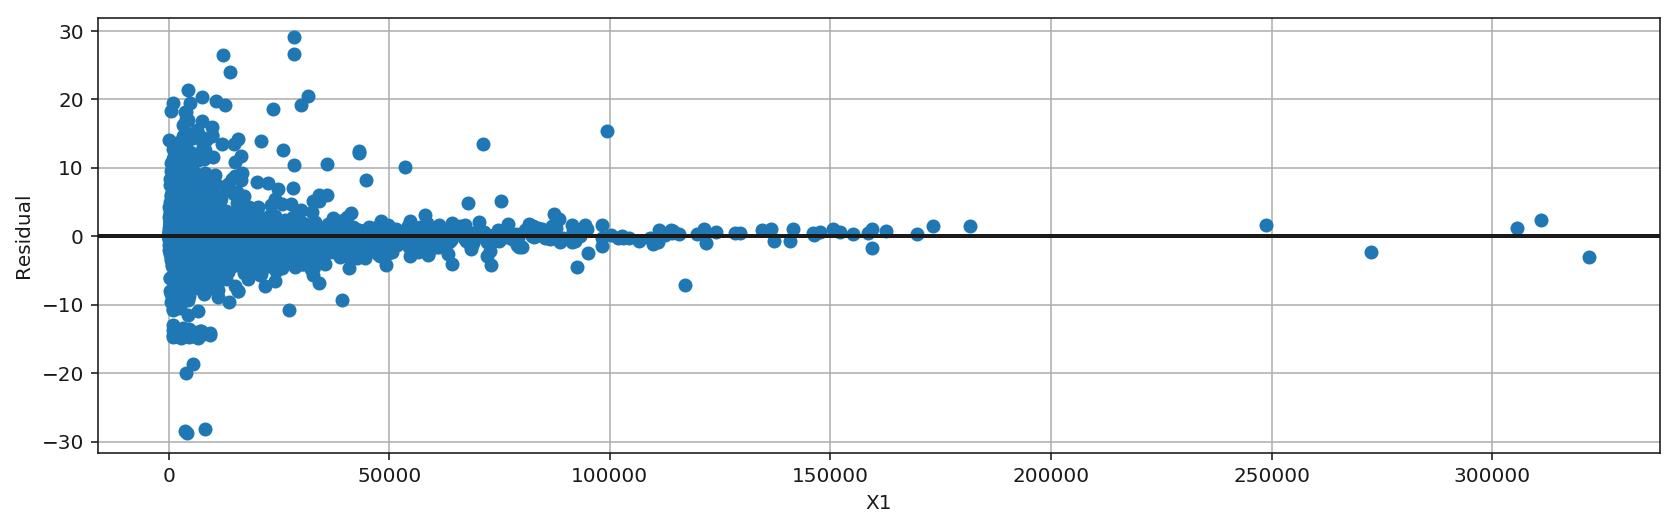

In [27]:
plt.plot(df['taxamount'], result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

In [28]:
# 오차의 기댓값이  x 와 상관없이 0이므로 잔차의 기댓값도  x 와 상관없이 0이어야 한다. 
# 그러나 여기서는 잔차가 정규 분포를 따르지 않으므로 x 값이 달라짐에 따라 분포의 형태가 달라짐을 볼 수 있다.

In [29]:
# 잔차가 정규 분포를 따르지 않아서 레버리지가 큰 아웃라이어를 제거하고 모델의 성능을 다시 살펴보기로 함.

### 4.2.4. Leverage and Outliers

#### 4.2.4.1. Cook's Distance

##### Leverage and Outliers

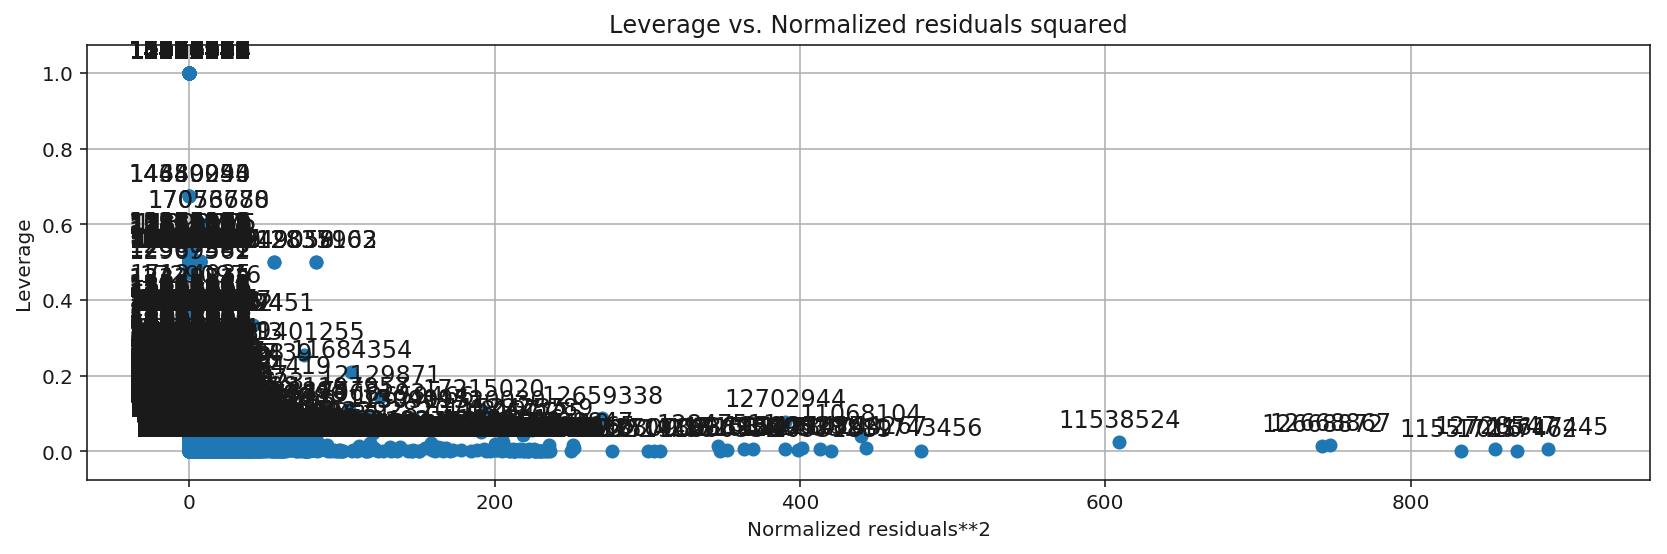

In [30]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

##### Fox' Outlier Recommendation

In [31]:
df.reset_index(inplace=True, drop=True)
pred = result.predict(df)
influence = result.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df["logerror"]) - 46-1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: divide by zero encountered in true_divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:403: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1

array([  111,   121,   132, ..., 90265, 90273, 90274], dtype=int64)

In [32]:
len(idx)

2443

##### 레버리지가 큰 아웃라이어 제거

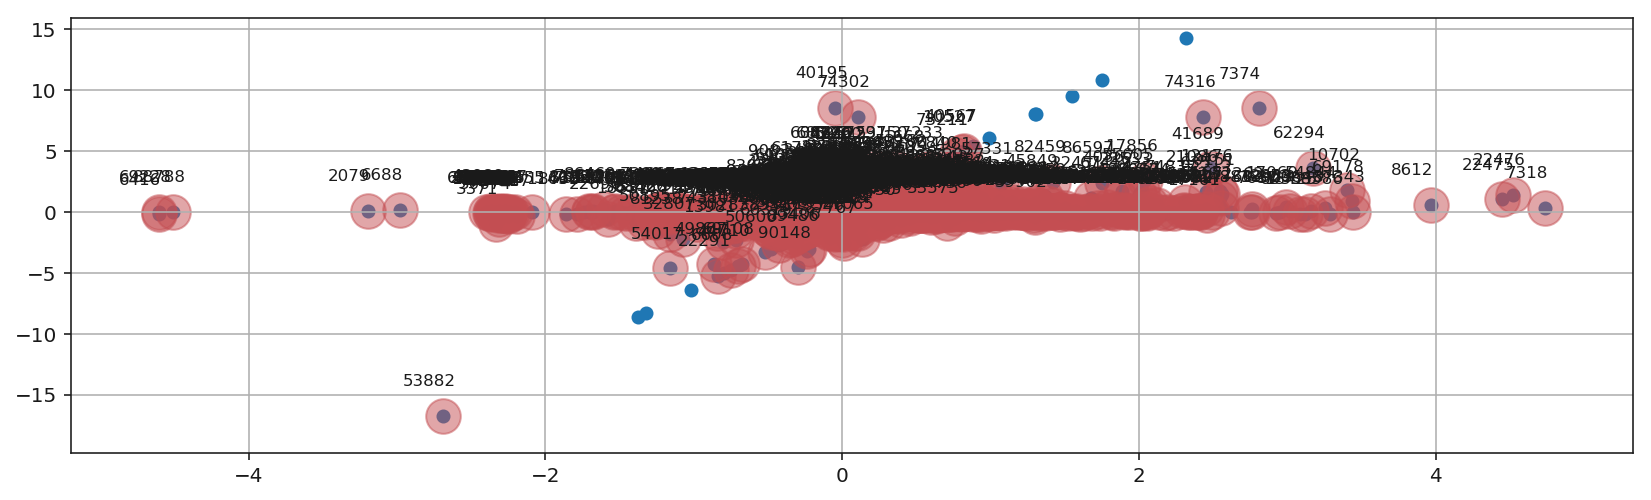

In [33]:
ax = plt.subplot()
plt.scatter(df["logerror"], pred)
plt.scatter(df["logerror"][idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, list(zip(df["logerror"][idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()

In [34]:
idx2 = list(set(range(len(df))).difference(idx))
dfX = df.iloc[idx2, :].reset_index(drop=True)

##### 유의 수준 10% 이상의 P-Value 제거

### 4.2.5. 회귀 분석 F-검정

##### 변수 중요도 비교

In [35]:
sm.stats.anova_lm(result, typ=2)

,sum_sq,df,F,PR(>F)
C(taxdelinquencyyear),66.166756,11.0,6.184233,2.921817e-10
C(propertycountylandusecode),691.850264,76.0,9.359167,2.185796e-103
C(fips),9.121076,2.0,4.688725,9.200709e-03
C(poolcnt),15.434588,1.0,15.868421,6.795700e-05
C(pooltypeid2),1.470562,1.0,1.511896,2.188533e-01
C(pooltypeid10),0.707899,1.0,0.727796,3.936008e-01
C(garagecarcnt),44.187301,15.0,3.028621,6.569651e-05
C(regionidcity),442.346720,176.0,2.583978,1.845170e-26
C(unitcnt),16.304210,10.0,1.676249,7.980724e-02
C(propertyzoningdesc),3063.491820,1995.0,1.578747,1.103024e-53


### 4.2.6. Multicollinearity

#### 4.2.6.1. VIF(Variance Inflation Factor)

In [36]:
only_num_df = pd.DataFrame(df, columns = numerical)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(only_num_df.values, i) for i in range(only_num_df.shape[1])]
vif["features"] = only_num_df.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.070440,lotsizesquarefeet
1,4.298688,regionidneighborhood
2,6.217192,structuretaxvaluedollarcnt
3,9.206133,landtaxvaluedollarcnt
4,9.315344,bathroomcnt
5,18.052423,taxamount
6,609.853950,finishedsquarefeet6
7,617.554625,latitude


In [37]:
del only_num_df['latitude']

In [38]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(only_num_df.values, i) for i in range(only_num_df.shape[1])]
vif["features"] = only_num_df.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.069668,lotsizesquarefeet
1,4.293246,regionidneighborhood
2,6.204589,structuretaxvaluedollarcnt
3,9.186965,bathroomcnt
4,9.196063,landtaxvaluedollarcnt
5,9.993038,finishedsquarefeet6
6,18.041200,taxamount


In [39]:
model3 = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood) + scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt) + 0', data = dfX)
print(model3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.01
Date:                Sat, 07 Jul 2018   Prob (F-statistic):          4.91e-178
Time:                        03:24:14   Log-Likelihood:            -1.2407e+05
No. Observations:               87832   AIC:                         2.483e+05
Df Residuals:                   87745   BIC:                         2.491e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

#### 4.2.6.2. PCA(Principal Component Analysis)

In [40]:
dfX2 = pd.DataFrame(dfX, columns=['taxamount', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'bathroomcnt', 'finishedsquarefeet6', 'lotsizesquarefeet', 'regionidneighborhood', 'latitude', 'poolcnt', 'garagecarcnt', 'unitcnt', 'heatingorsystemtypeid', 'fips', 'fireplacecnt', 'propertylandusetypeid', 'roomcnt', 'bedroomcnt'])
dfX3 = pd.DataFrame(PCA(n_components=5).fit_transform(dfX2))
model4 = sm.OLS(dfX['logerror'], dfX3)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.12
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           9.14e-12
Time:                        03:24:14   Log-Likelihood:                 72603.
No. Observations:               87832   AIC:                        -1.452e+05
Df Residuals:                   87827   BIC:                        -1.451e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -1.283e-11   9.06e-10     -0.014      0.9

## 4.3. Cross Validation

### 4.3.1. K-fold CV

In [41]:
dfX_target = dfX['logerror']
dfX_others = dfX2

In [42]:
model = LinearRegression()
cv = KFold(5)

scores = np.zeros(5)
for i, (train_index, test_index) in enumerate(cv.split(dfX2)):
    X_train = dfX_others.values[train_index]
    y_train = dfX_target.values[train_index]
    X_test = dfX_others.values[test_index]
    y_test = dfX_target.values[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([0.00992672, 0.00576166, 0.00205249, 0.00928114, 0.00433507])

In [43]:
cross_val_score(model, dfX_others, dfX_target, cv=cv)

array([0.00992672, 0.00576166, 0.00205249, 0.00928114, 0.00433507])

## 4.4. Final Prediction

In [52]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood) + scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt) + 0', data = dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.01
Date:                Sat, 07 Jul 2018   Prob (F-statistic):          4.91e-178
Time:                        03:35:25   Log-Likelihood:            -1.2407e+05
No. Observations:               87832   AIC:                         2.483e+05
Df Residuals:                   87745   BIC:                         2.491e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

## 5. Kaggle 

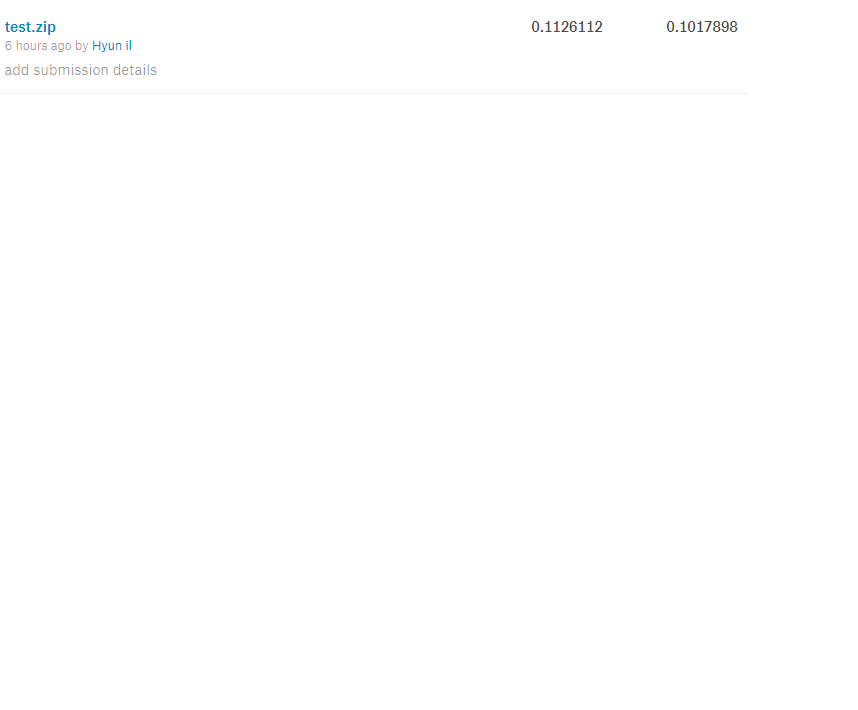

In [63]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("kaggle.png")

### 5.1.1. 한계

## 6.결론 - Insight와 한계점

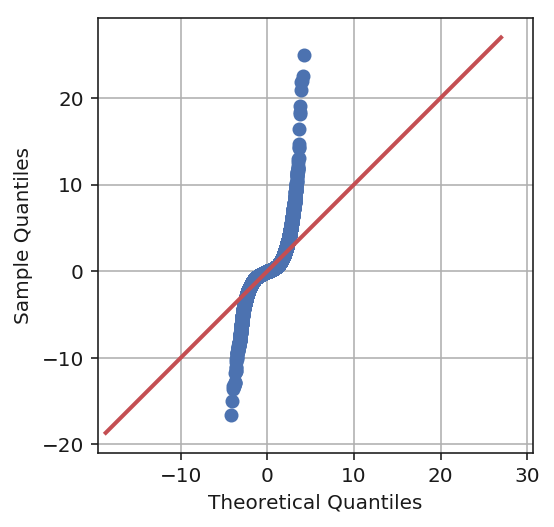

In [53]:
sm.qqplot(result.resid, fit=True, line='45');
plt.gca().axis("square");

In [54]:
sp.stats.normaltest(result.resid)

NormaltestResult(statistic=45275.300221813864, pvalue=0.0)

#### 6.1. 대안
 - XGBoost, CatBoost, LightGBM